In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from distutils.dir_util import copy_tree, remove_tree
from random import randint
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_addons as tfa
from keras import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator as IDG
import cv2
import keras

c:\Users\Jaswanth\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
base='./data2/'
# root_dir='./'
test=base+"test/"
train=base+"train/"
wdr="./dataset4/"
# if os.path.exists(wdr):
#     remove_tree(wdr)
# os.mkdir(wdr)
# copy_tree(train,wdr)
# copy_tree(test,wdr)
print("wdc:",os.listdir(wdr))

wdc: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
work='./dataset4/'
classes=['glioma', 'meningioma', 'notumor', 'pituitary']
idm=176
ida=[176,208]
DIM=(idm,idm)

In [4]:
train_data_gen=IDG(rescale=1./255)
train_data_gen = train_data_gen.flow_from_directory(directory=work, target_size=DIM, batch_size=10185)

Found 10185 images belonging to 4 classes.


In [5]:
train_data,train_labels=train_data_gen.next()

In [6]:
sm=SMOTE(random_state=42)
train_data,train_labels=sm.fit_resample(train_data.reshape(-1,idm*idm*3),train_labels)
train_data=train_data.reshape(-1,idm,idm,3)
print(train_data.shape,train_labels.shape)

(10636, 176, 176, 3) (10636, 4)


In [7]:
train_data,test_data,train_labels,test_labels=train_test_split(train_data,train_labels,test_size=0.2,random_state=42)
train_data,val_data,train_labels,val_labels=train_test_split(train_data,train_labels,test_size=0.2,random_state=42)

In [8]:
model1=keras.models.load_model('./btmodels/BT_CNN_model7')
model2=keras.models.load_model('./btmodels/BT_CNN_Res_model_t1')
model3=keras.models.load_model('./btmodels/BT_CNN_model_inc_1')

In [9]:
METRICS=[tf.keras.metrics.CategoricalAccuracy(name='train_acc'),
         tf.keras.metrics.AUC(name='val_acc'),
         tfa.metrics.F1Score(num_classes=4)]
model1.compile(loss=tf.losses.CategoricalCrossentropy(),metrics=METRICS)
model2.compile(loss=tf.losses.CategoricalCrossentropy(),metrics=METRICS)
model3.compile(loss=tf.losses.CategoricalCrossentropy(),metrics=METRICS)

In [10]:
model1.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 4, 4, 1536)        54336736  
 ional)                                                          
                                                                 
 dropout_15 (Dropout)        (None, 4, 4, 1536)        0         
                                                                 
 global_average_pooling2d_3  (None, 1536)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_3 (Flatten)         (None, 1536)              0         
                                                                 
 batch_normalization_827 (B  (None, 1536)              6144      
 atchNormalization)                                              
                                               

In [11]:
model2.summary()

Model: "resnet_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 6, 6, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 6, 6, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)          

In [12]:
model3.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 dropout (Dropout)           (None, 4, 4, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 512)       

In [13]:
EPOCHS=10
history1=model1.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=EPOCHS)

Epoch 1/10
 76/213 [=========>....................] - ETA: 3:14 - loss: 0.0976 - train_acc: 0.9733 - val_acc: 0.9960 - f1_score: 0.9730

KeyboardInterrupt: 

In [ ]:
EPOCHS=10
history2=model2.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=EPOCHS)

In [ ]:
EPOCHS=10
history3=model3.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=EPOCHS)

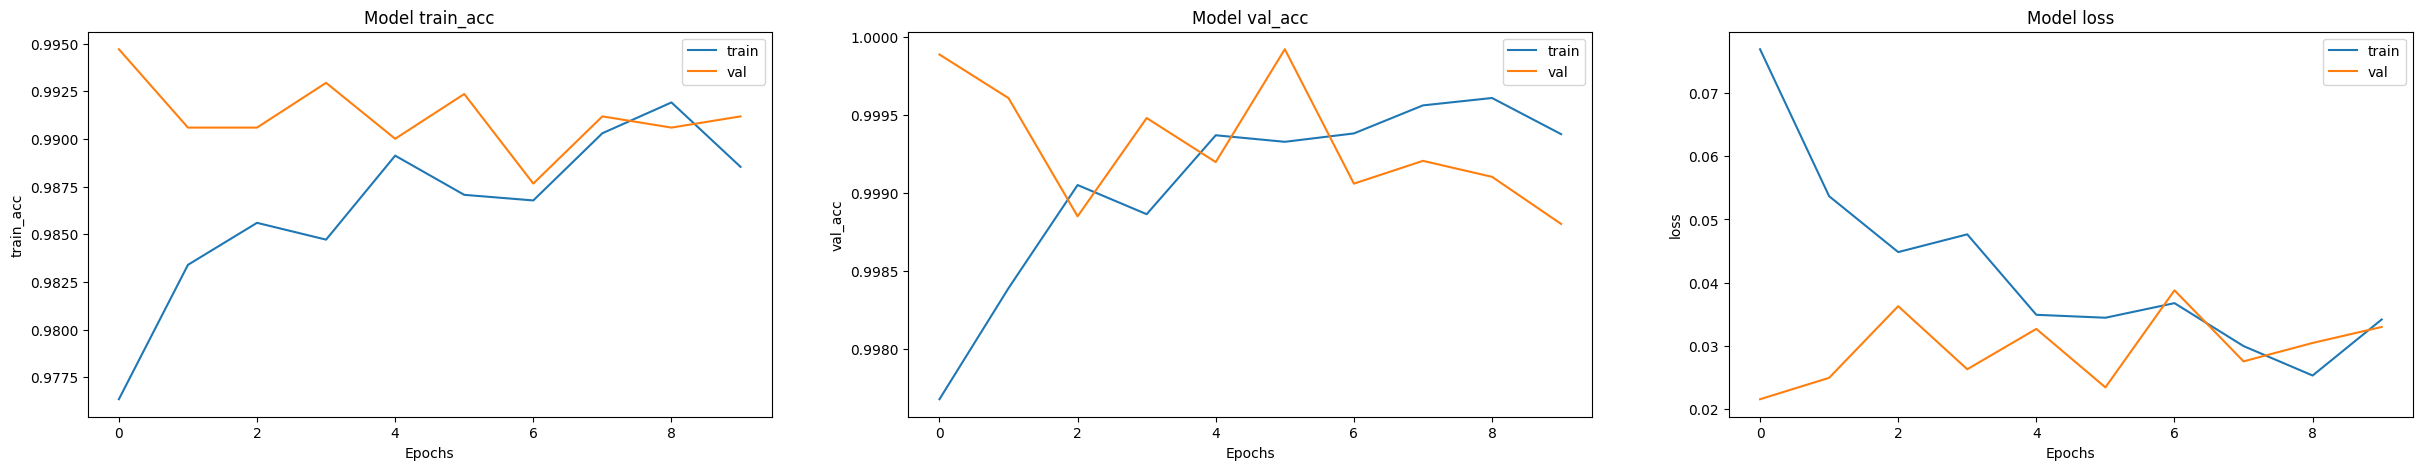

In [ ]:
fig ,ax=plt.subplots(1,3,figsize=(30,5))
ax=ax.ravel()
for i,metric in enumerate(["train_acc","val_acc","loss"]):
    ax[i].plot(history1.history[metric])
    ax[i].plot(history1.history["val_"+metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

In [ ]:
fig ,ax=plt.subplots(1,3,figsize=(30,5))
ax=ax.ravel()
for i,metric in enumerate(["train_acc","val_acc","loss"]):
    ax[i].plot(history2.history[metric])
    ax[i].plot(history2.history["val_"+metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

In [ ]:
fig ,ax=plt.subplots(1,3,figsize=(30,5))
ax=ax.ravel()
for i,metric in enumerate(["train_acc","val_acc","loss"]):
    ax[i].plot(history3.history[metric])
    ax[i].plot(history3.history["val_"+metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train","val"])

In [ ]:
test_scores1=model1.evaluate(test_data,test_labels)
print("Loss: ", test_scores1[0])
print("Accuracy: ", test_scores1[1])

67/67 [==============================] - 58s 869ms/step - loss: 0.0364 - train_acc: 0.9939 - val_acc: 0.9978 - f1_score: 0.9937
Loss:  0.03635111078619957
Accuracy:  0.9938910007476807


In [ ]:
test_scores2=model2.evaluate(test_data,test_labels)
print("Loss: ", test_scores2[0])
print("Accuracy: ", test_scores2[1])

In [ ]:
test_scores3=model3.evaluate(test_data,test_labels)
print("Loss: ", test_scores3[0])
print("Accuracy: ", test_scores3[1])

In [ ]:
pred_labels1=model1.predict(test_data)
pred_labels2=model2.predict(test_data)
pred_labels3=model3.predict(test_data)

67/67 [==============================] - 80s 1s/step


In [ ]:
def roundoff(arr):
    arr[np.argwhere(arr!=arr.max())]=0
    arr[np.argwhere(arr==arr.max())]=1
    return arr
for labels1 in pred_labels1:
    labels1=roundoff(labels1)
for labels2 in pred_labels2:
    labels1=roundoff(labels2)
for labels3 in pred_labels3:
    labels3=roundoff(labels3)
print(classification_report(test_labels,pred_labels1,pred_labels2,pred_labels3,target_names=classes))

              precision    recall  f1-score   support

      glioma       1.00      0.98      0.99       505
  meningioma       0.98      1.00      0.99       522
     notumor       1.00      1.00      1.00       550
   pituitary       1.00      1.00      1.00       551

   micro avg       0.99      0.99      0.99      2128
   macro avg       0.99      0.99      0.99      2128
weighted avg       0.99      0.99      0.99      2128
 samples avg       0.99      0.99      0.99      2128



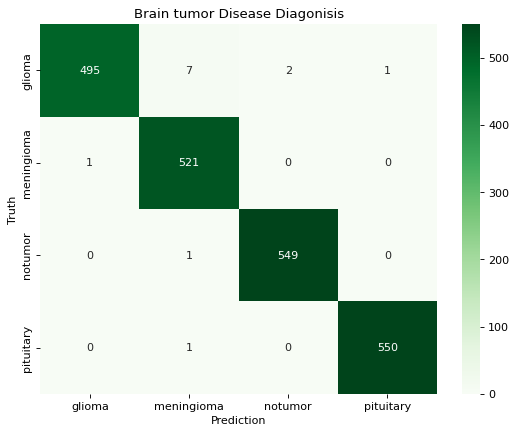

In [ ]:
pred_ls1=np.argmax(pred_labels1,axis=1)
test_ls1=np.argmax(test_labels,axis=1)
pred_ls2=np.argmax(pred_labels2,axis=1)
test_ls2=np.argmax(test_labels,axis=1)
pred_ls3=np.argmax(pred_labels3,axis=1)
test_ls3=np.argmax(test_labels,axis=1)


In [ ]:
print('Balanced Accuracy score {}%'.format(round(BAS(test_ls1,pred_ls1)*100,2)))
print('Matthews Correleation Corrcoef {}%'.format(round(MCC(test_ls1,pred_ls1)*100,2)))
print('Balanced Accuracy score {}%'.format(round(BAS(test_ls2,pred_ls2)*100,2)))
print('Matthews Correleation Corrcoef {}%'.format(round(MCC(test_ls2,pred_ls2)*100,2)))
print('Balanced Accuracy score {}%'.format(round(BAS(test_ls3,pred_ls3)*100,2)))
print('Matthews Correleation Corrcoef {}%'.format(round(MCC(test_ls3,pred_ls3)*100,2)))

Balanced Accuracy score 99.37%
Matthews Correleation Corrcoef 99.19%
